In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'CE'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2004-09-30,1239,-985,254,-76,819,826,565,2877,528,...,583,0,127,1742,2973,7119,109,-100,99.37,2004-11-09
1,2004-12-31,1194,-927,267,70,838,843,604,3151,747,...,716,0,144,1995,3243,7522,-166,-54,99.37,2005-02-21
2,2005-03-31,1478,-1106,372,5,1738,998,640,4111,779,...,778,0,139,2799,3300,8342,42,-40,166.20,2005-05-10
3,2005-06-30,1489,-1145,344,82,959,955,586,3207,813,...,682,0,140,1812,3253,7270,148,-46,166.20,2005-08-09
4,2005-09-30,1526,-1240,286,50,401,947,625,2610,1042,...,698,0,181,1932,3315,7281,323,-46,166.20,2005-11-09


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
77,2023-12-31,2024-02-21,109.38,2569,-1956,613,707,1805,1243,2357,...,3975,26597,1510,358,1025,4072,12301,19506,830,-128
78,2024-03-31,2024-05-10,109.23,2611,-2057,554,124,1483,1289,2354,...,3902,26033,1447,91,2348,4925,11018,18962,101,-137
79,2024-06-30,2024-08-09,109.23,2651,-2010,641,154,1185,1264,2464,...,3844,25812,1538,101,1876,4626,11058,18646,292,-105
80,2024-09-30,2024-11-09,109.23,2648,-2026,622,122,813,1367,2562,...,3858,25892,1446,231,1376,4159,11324,18618,79,-88
81,2024-12-31,2025-02-21,109.23,2370,-1831,539,-1906,962,1121,2284,...,3641,22857,1228,108,1393,3853,11078,17682,494,-105


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
77,2023-12-31,2024-02-21,109.38,2569,-1956,613,707,1805,1243,2357,...,26597,1510,358,1025,4072,12301,19506,830,-128,1
78,2024-03-31,2024-05-10,109.23,2611,-2057,554,124,1483,1289,2354,...,26033,1447,91,2348,4925,11018,18962,101,-137,1
79,2024-06-30,2024-08-09,109.23,2651,-2010,641,154,1185,1264,2464,...,25812,1538,101,1876,4626,11058,18646,292,-105,1
80,2024-09-30,2024-11-09,109.23,2648,-2026,622,122,813,1367,2562,...,25892,1446,231,1376,4159,11324,18618,79,-88,1
81,2024-12-31,2025-02-21,109.23,2370,-1831,539,-1906,962,1121,2284,...,22857,1228,108,1393,3853,11078,17682,494,-105,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
77,2023-12-31,2024-02-21,109.38,2569.0,-1956.0,613.0,707.0,1805.0,1243.0,2357.0,...,26597.0,1510.0,358.0,1025.0,4072.0,12301.0,19506.0,830.0,-128.0,1
78,2024-03-31,2024-05-10,109.23,2611.0,-2057.0,554.0,124.0,1483.0,1289.0,2354.0,...,26033.0,1447.0,91.0,2348.0,4925.0,11018.0,18962.0,101.0,-137.0,1
79,2024-06-30,2024-08-09,109.23,2651.0,-2010.0,641.0,154.0,1185.0,1264.0,2464.0,...,25812.0,1538.0,101.0,1876.0,4626.0,11058.0,18646.0,292.0,-105.0,1
80,2024-09-30,2024-11-09,109.23,2648.0,-2026.0,622.0,122.0,813.0,1367.0,2562.0,...,25892.0,1446.0,231.0,1376.0,4159.0,11324.0,18618.0,79.0,-88.0,1
81,2024-12-31,2025-02-21,109.23,2370.0,-1831.0,539.0,-1906.0,962.0,1121.0,2284.0,...,22857.0,1228.0,108.0,1393.0,3853.0,11078.0,17682.0,494.0,-105.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2005-01-17,12.037642,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,-0.007501,1.007501,0.0,0.0,0.0,0.0,0.205004,-0.06134,0.0,0.0
1,2005-01-24,12.037642,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,-0.007501,1.007501,0.0,0.0,0.0,0.0,0.205004,-0.06134,0.0,0.0
2,2005-01-31,12.067736,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,-0.007501,1.007501,0.0,0.0,0.0,0.0,0.205004,-0.06134,0.0,0.0
3,2005-02-07,11.714134,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,-0.007501,1.007501,0.0,0.0,0.0,0.0,0.205004,-0.06134,0.0,0.0
4,2005-02-14,12.594378,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,-0.007501,1.007501,0.0,0.0,0.0,0.0,0.205004,-0.06134,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2005-01-17,12.037642,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,0.0,0.205004,-0.06134,0.0,0.0,inf,-22.569444,inf,inf,inf
1,2005-01-24,12.037642,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,0.0,0.205004,-0.06134,0.0,0.0,inf,-22.569444,inf,inf,inf
2,2005-01-31,12.067736,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,0.0,0.205004,-0.06134,0.0,0.0,inf,-22.625866,inf,inf,inf
3,2005-02-07,11.714134,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,0.0,0.205004,-0.06134,0.0,0.0,inf,-21.962897,inf,inf,inf
4,2005-02-14,12.594378,2004-09-30,1239.0,0.0,-0.53336,99.37,0.0,0.0,819.0,...,0.0,0.205004,-0.06134,0.0,0.0,inf,-23.613271,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

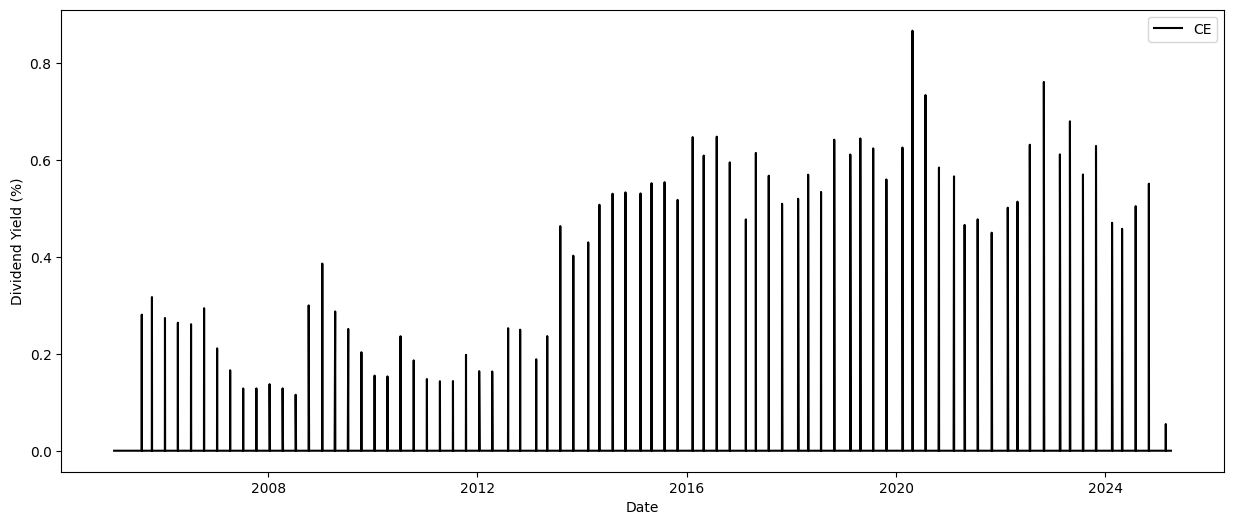

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


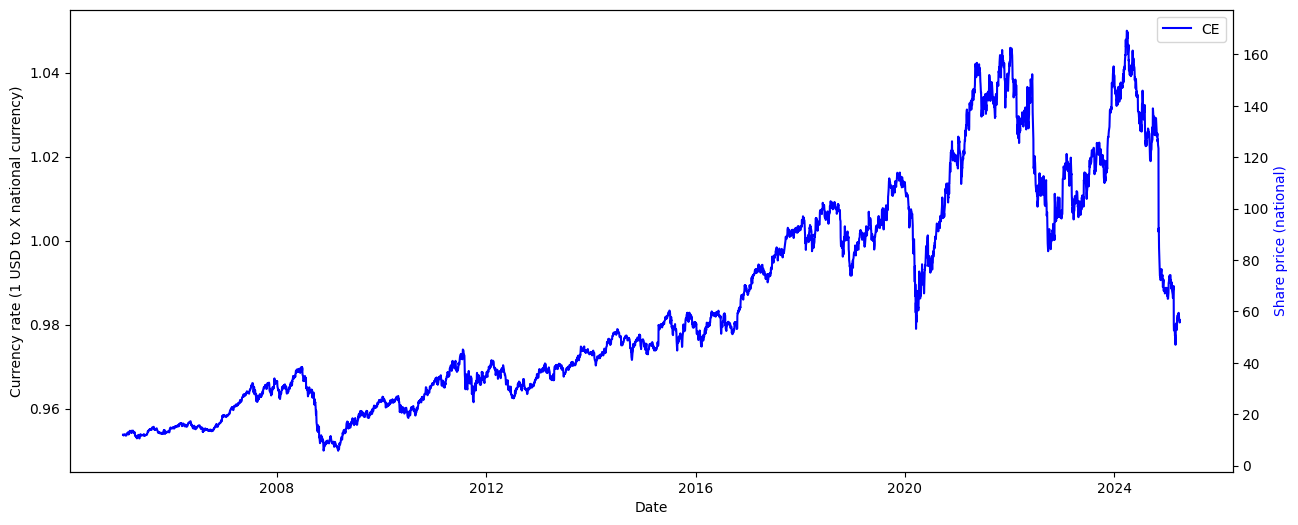

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

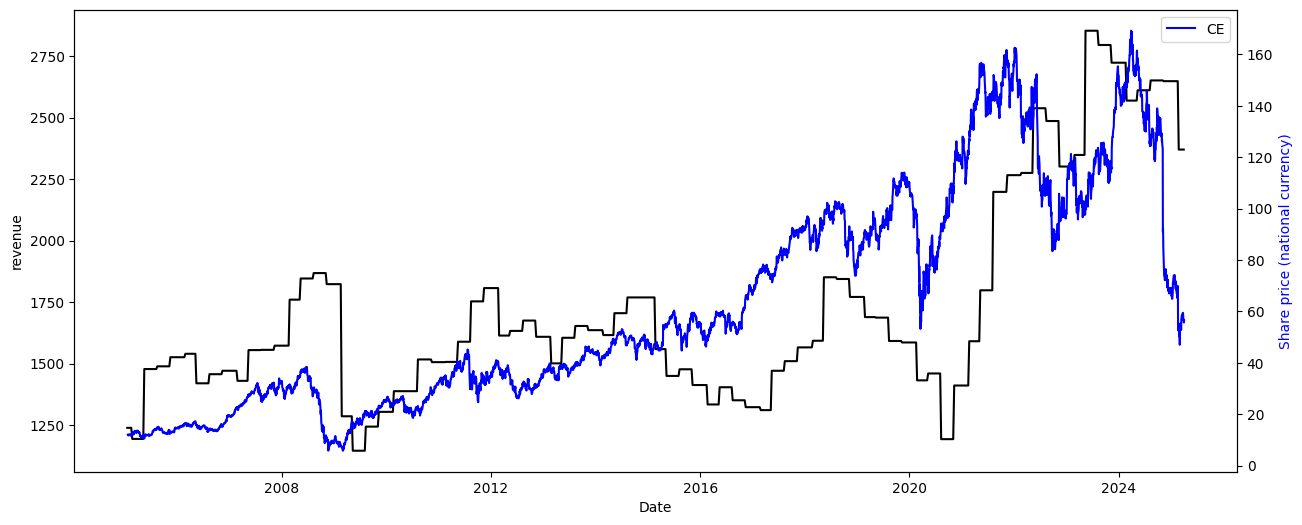

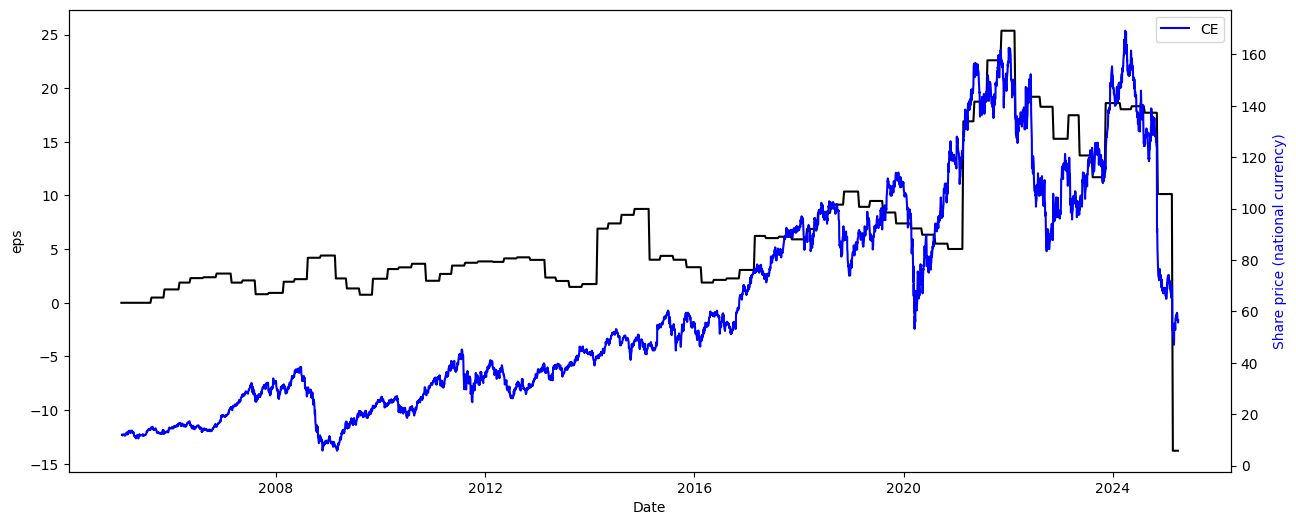

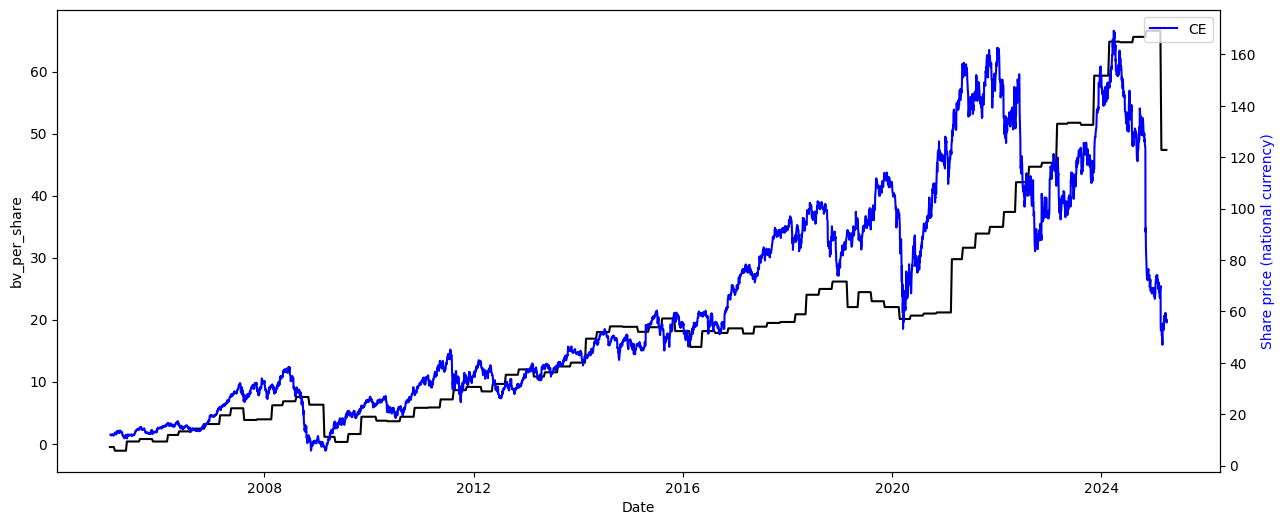

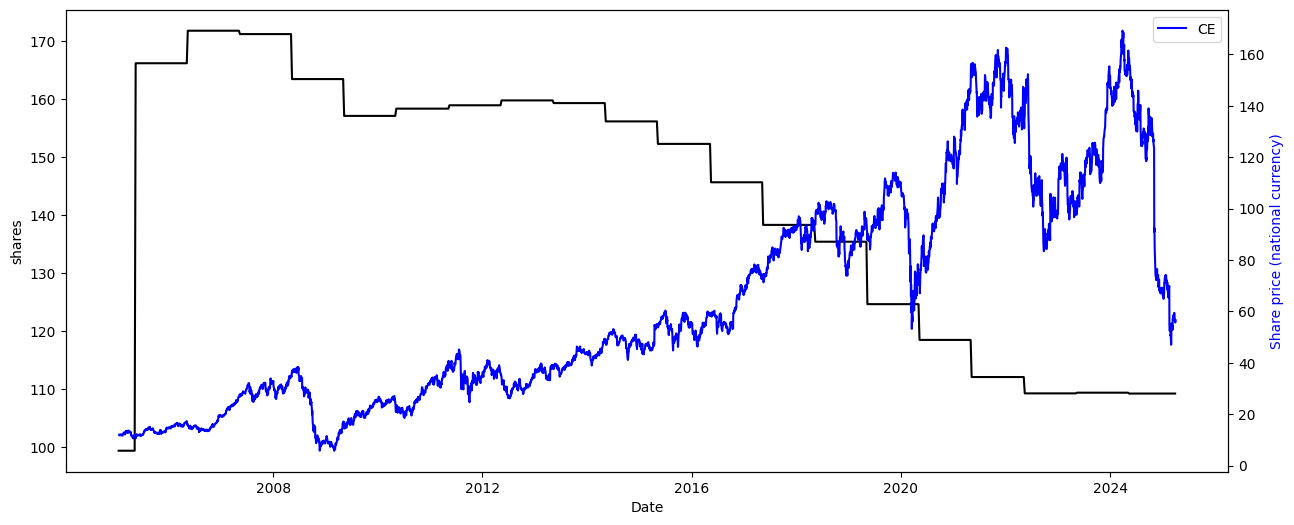

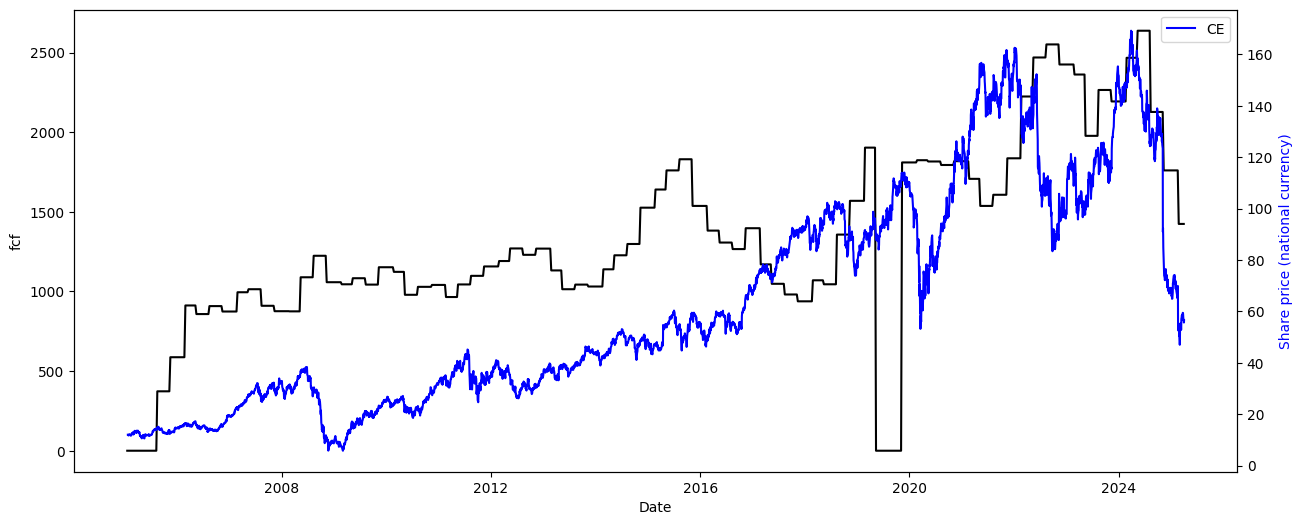

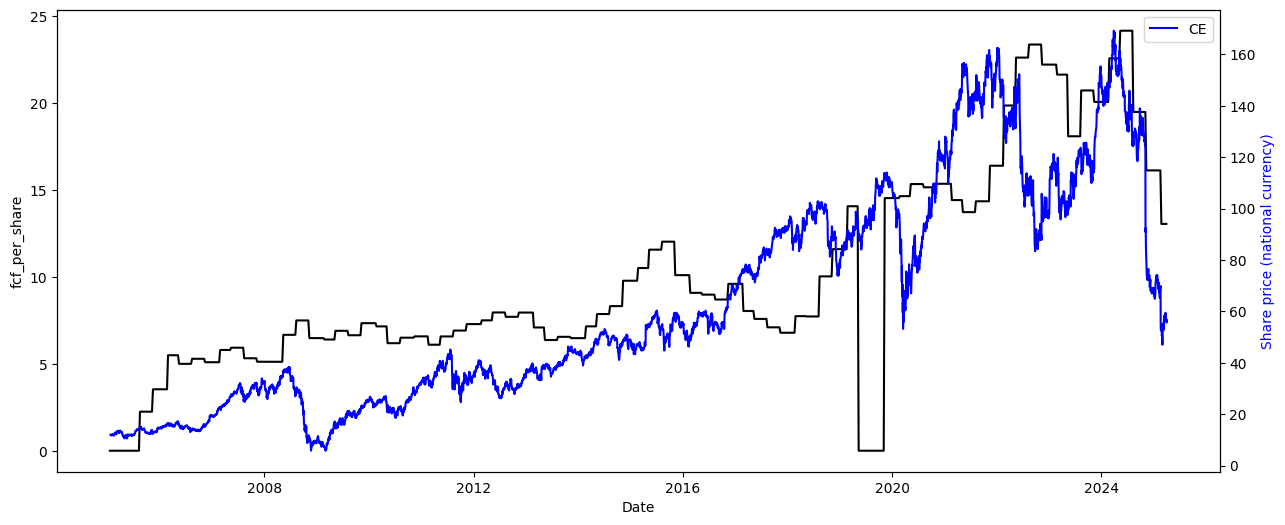

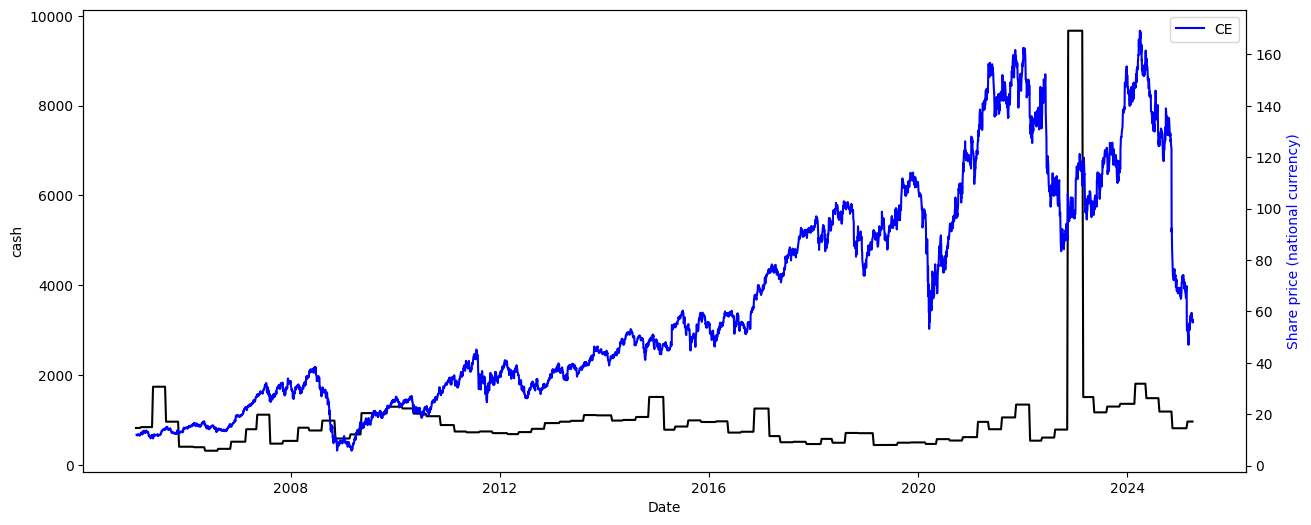

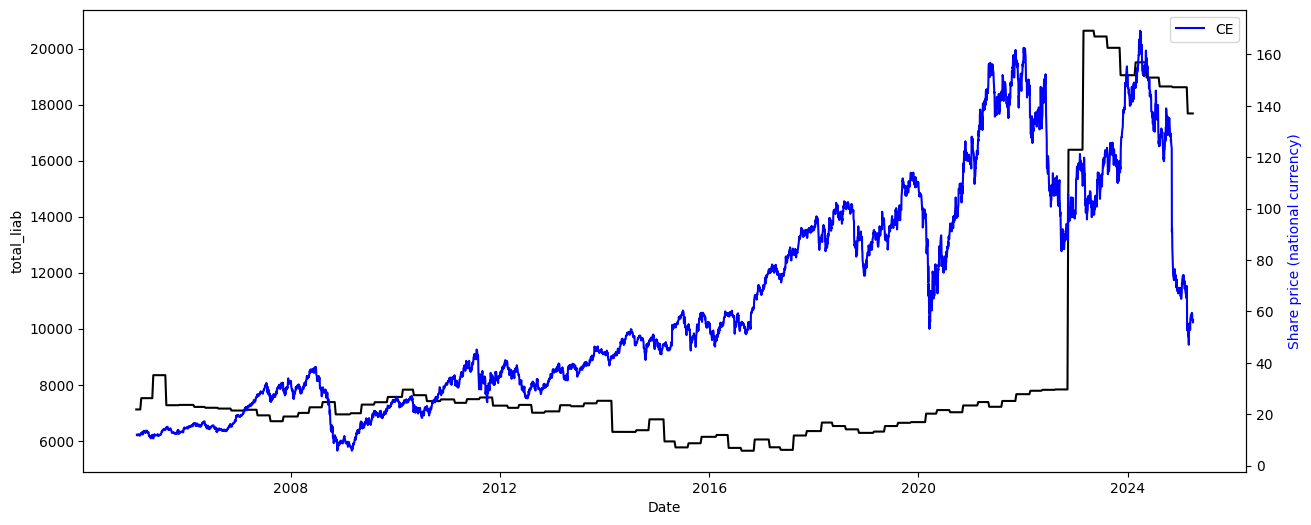

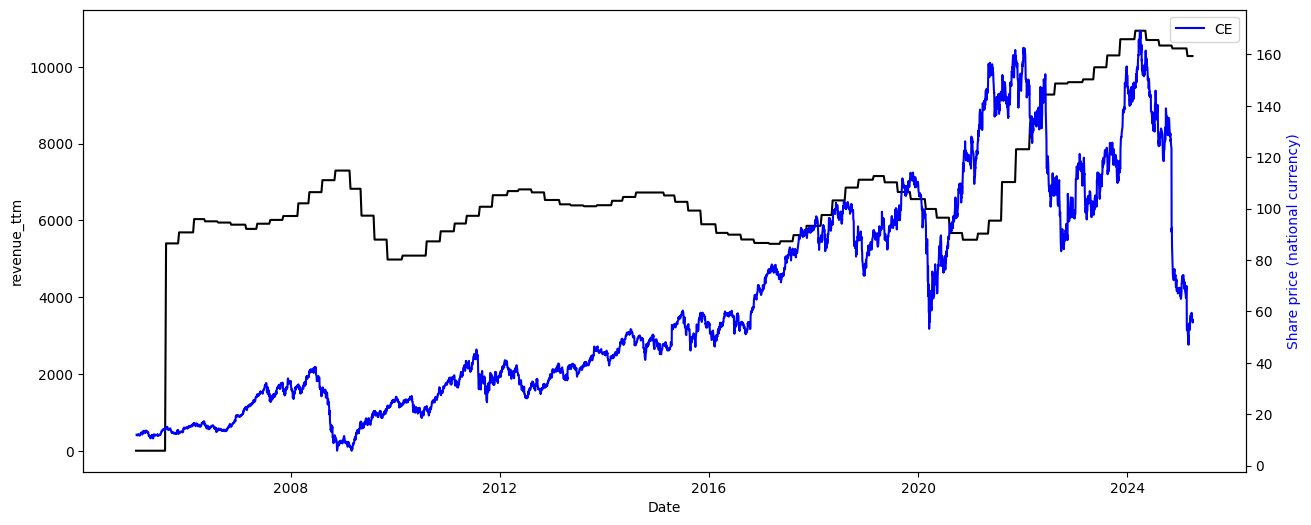

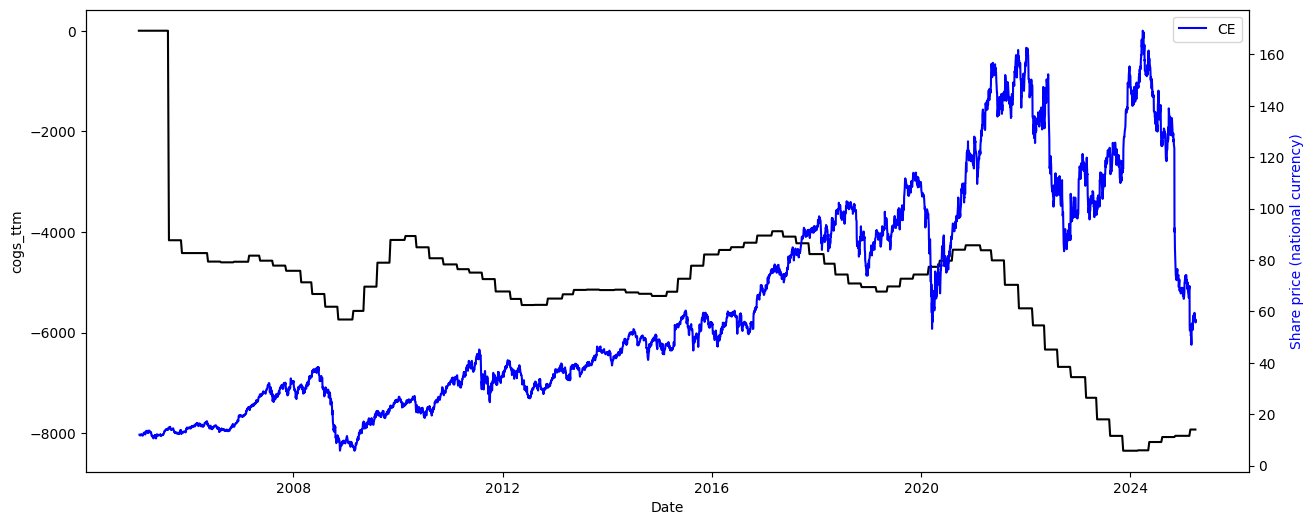

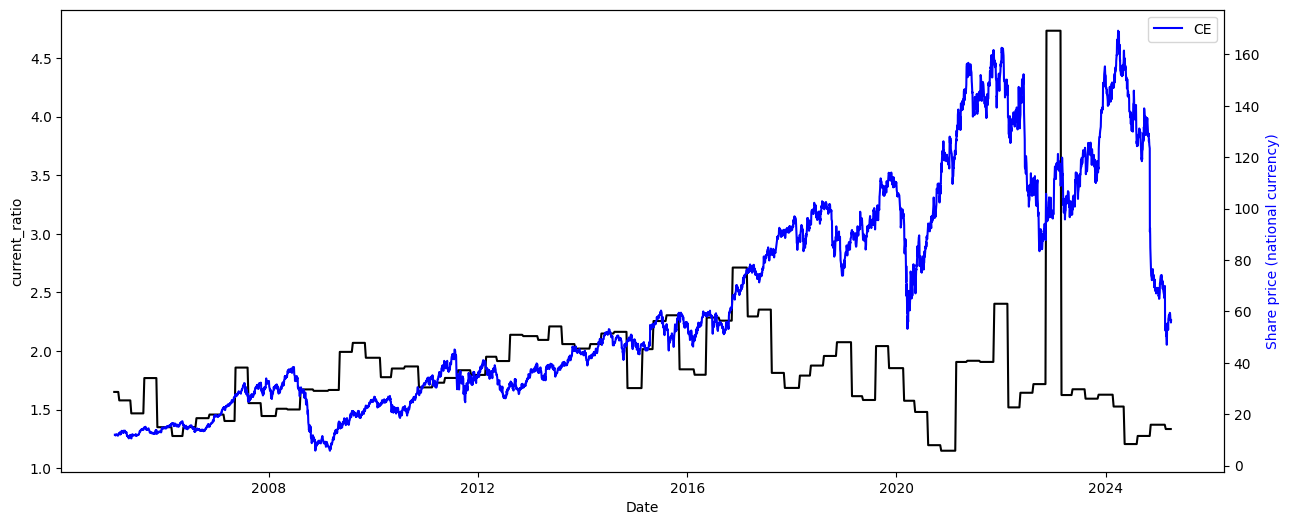

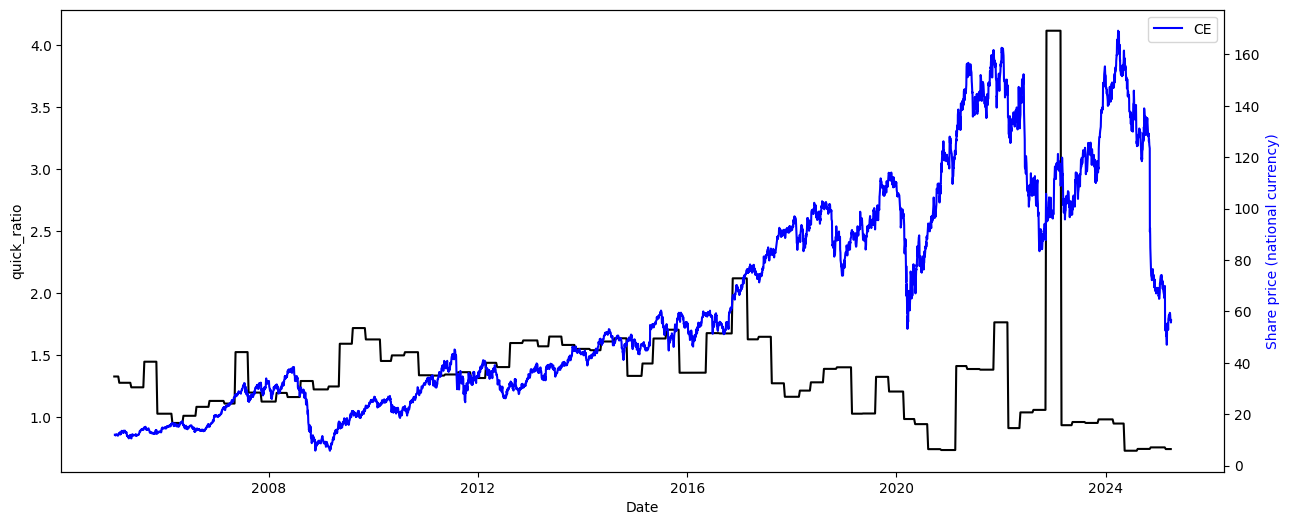

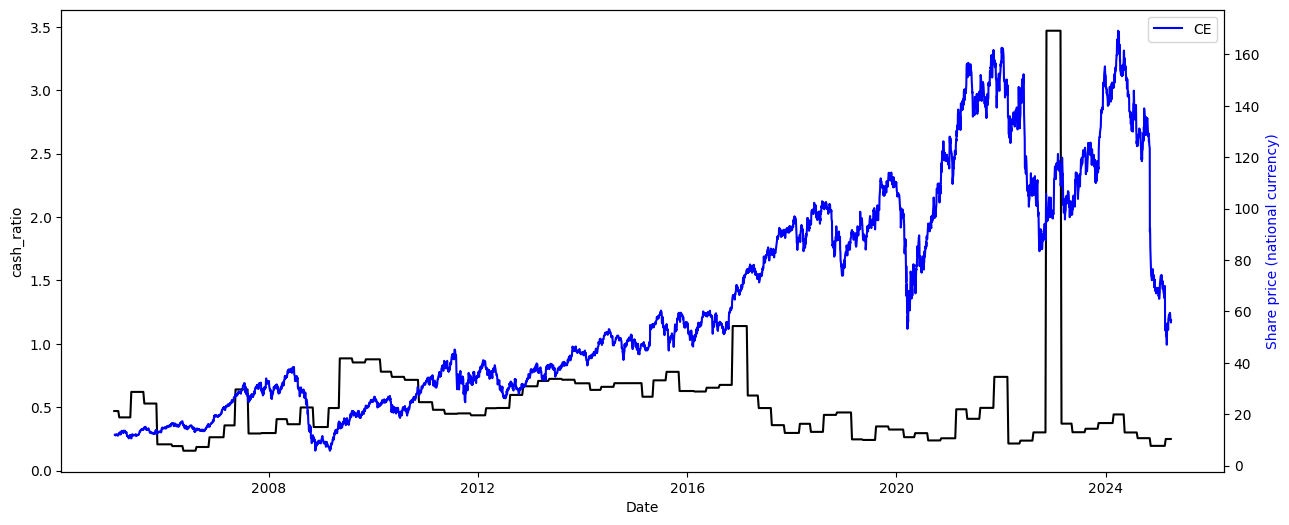

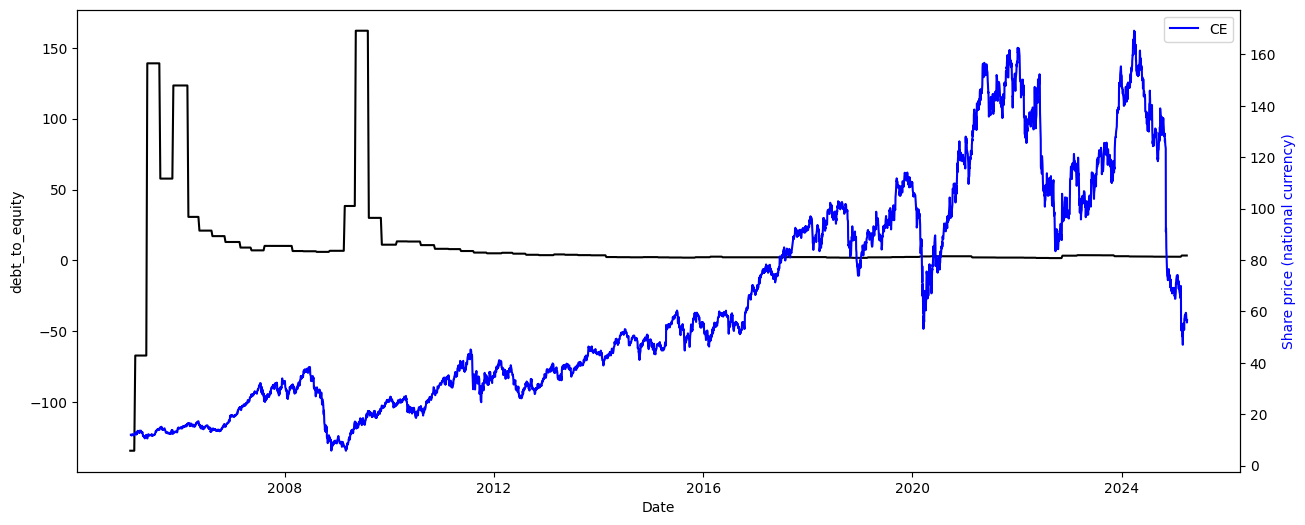

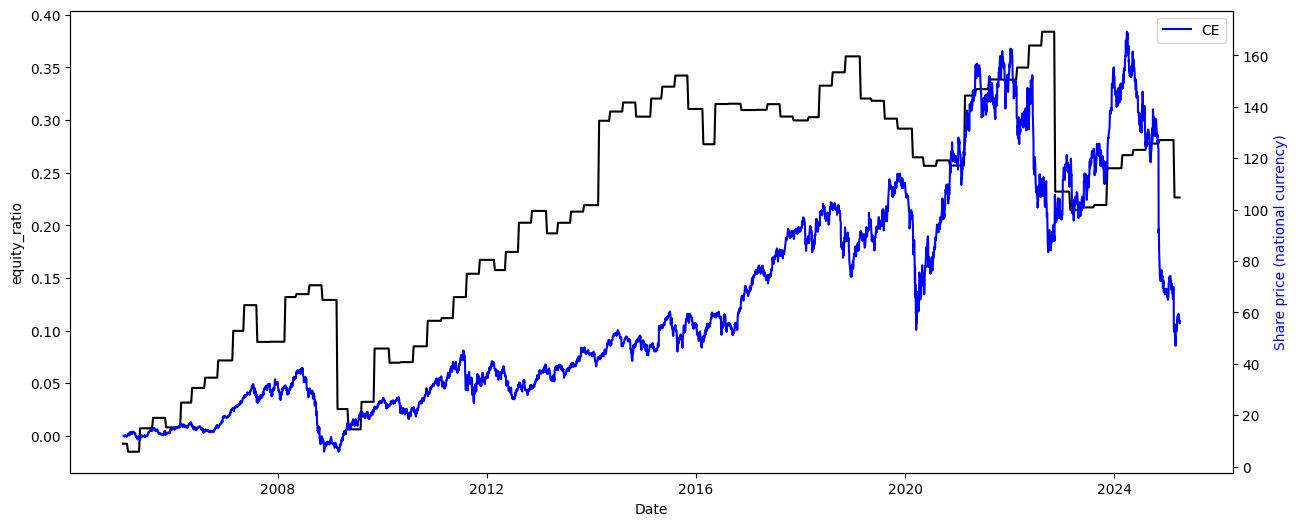

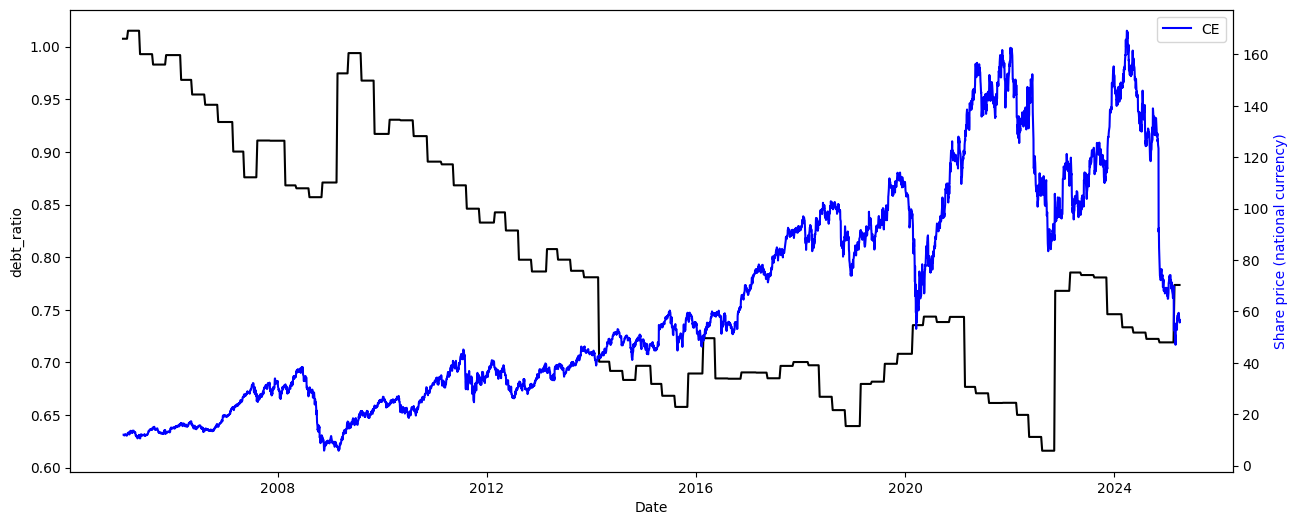

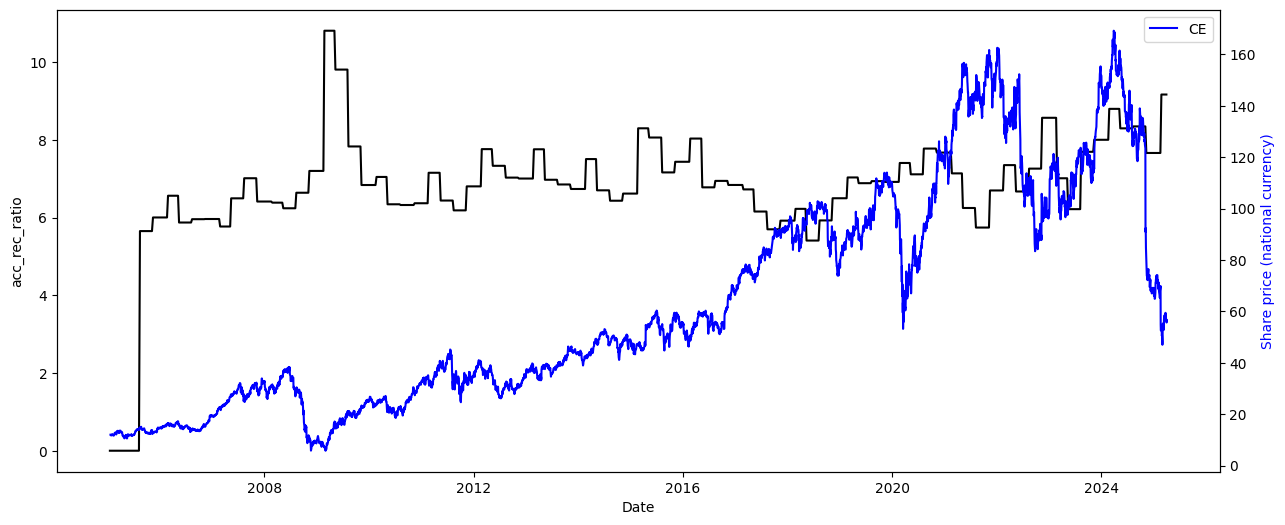

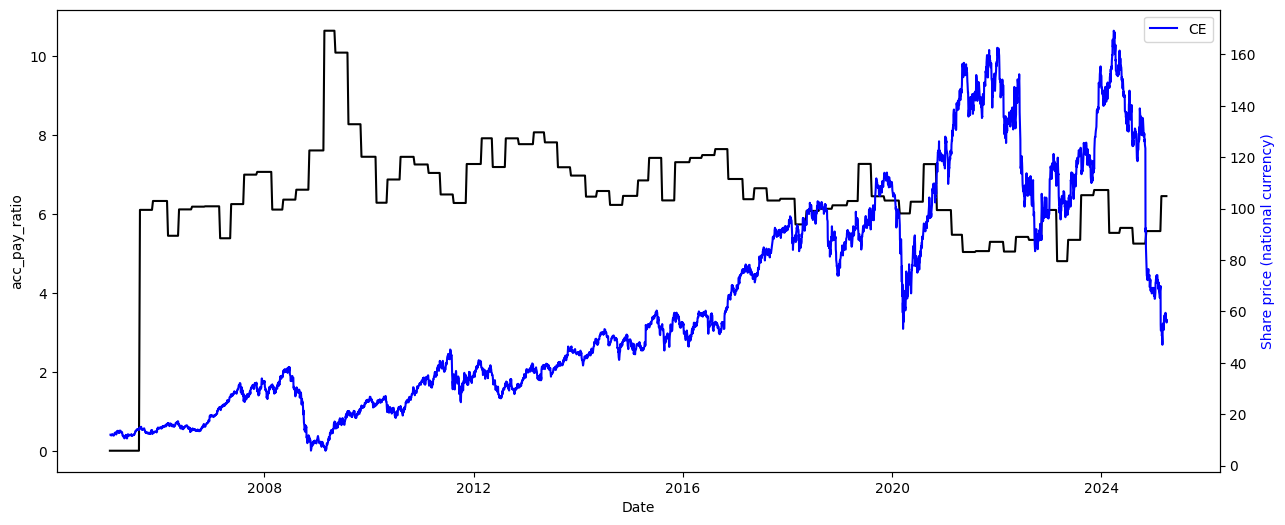

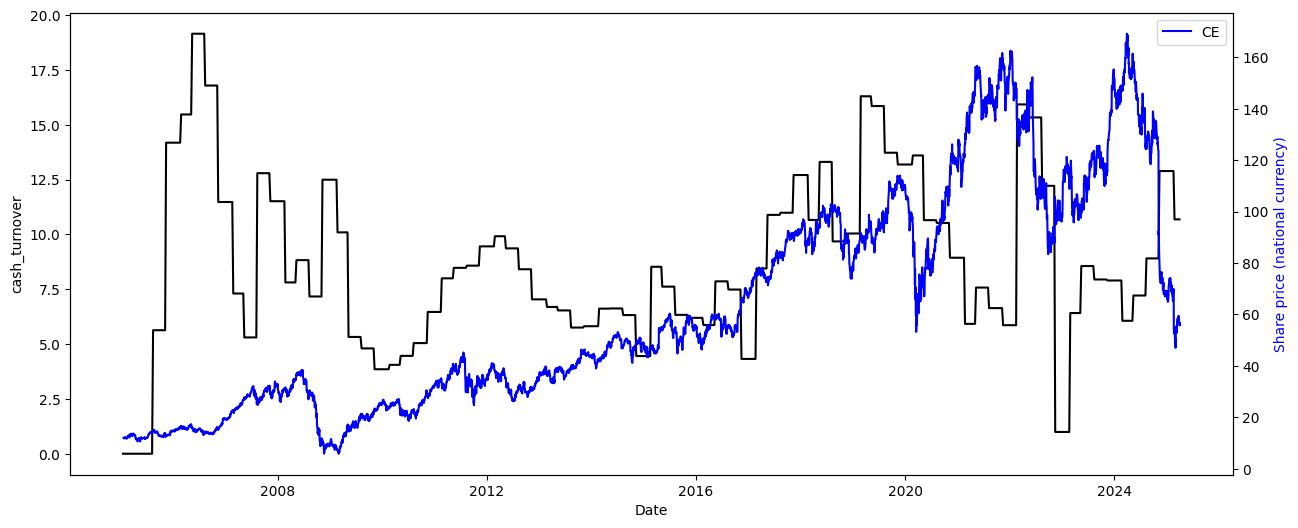

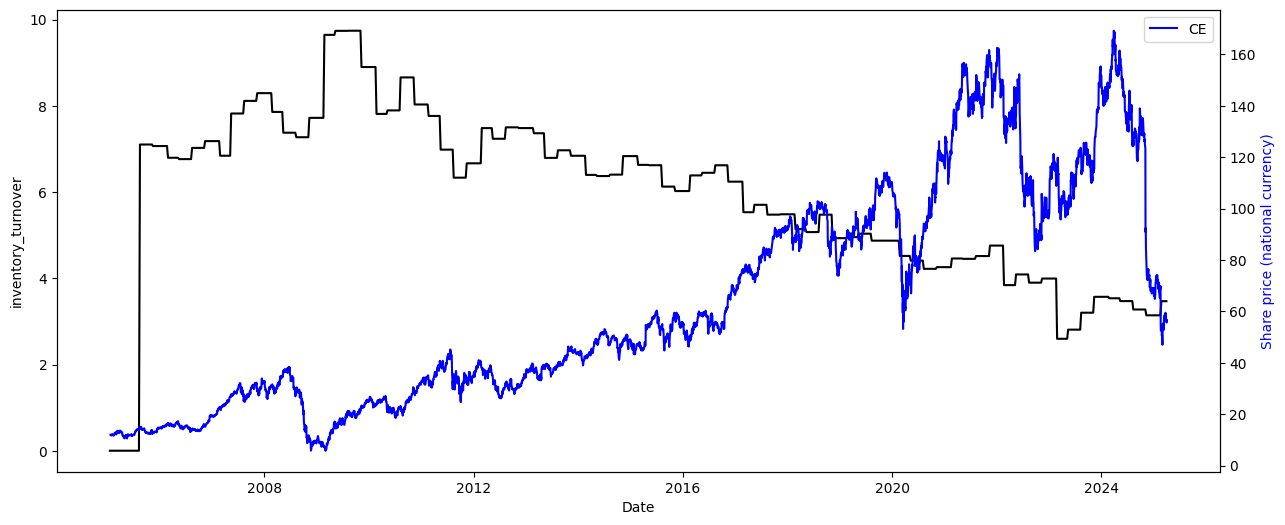

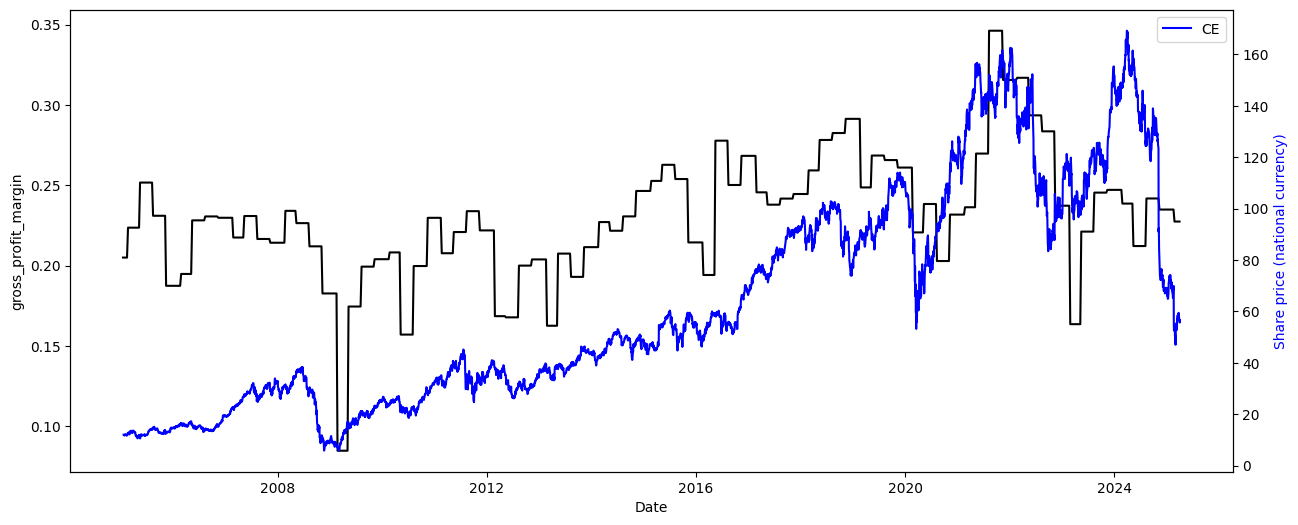

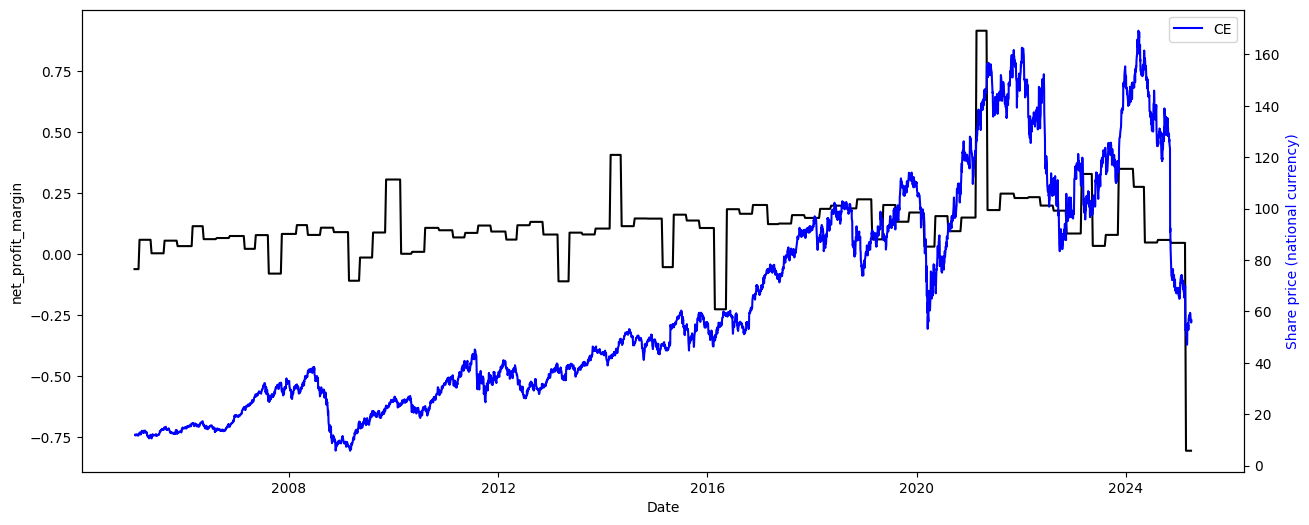

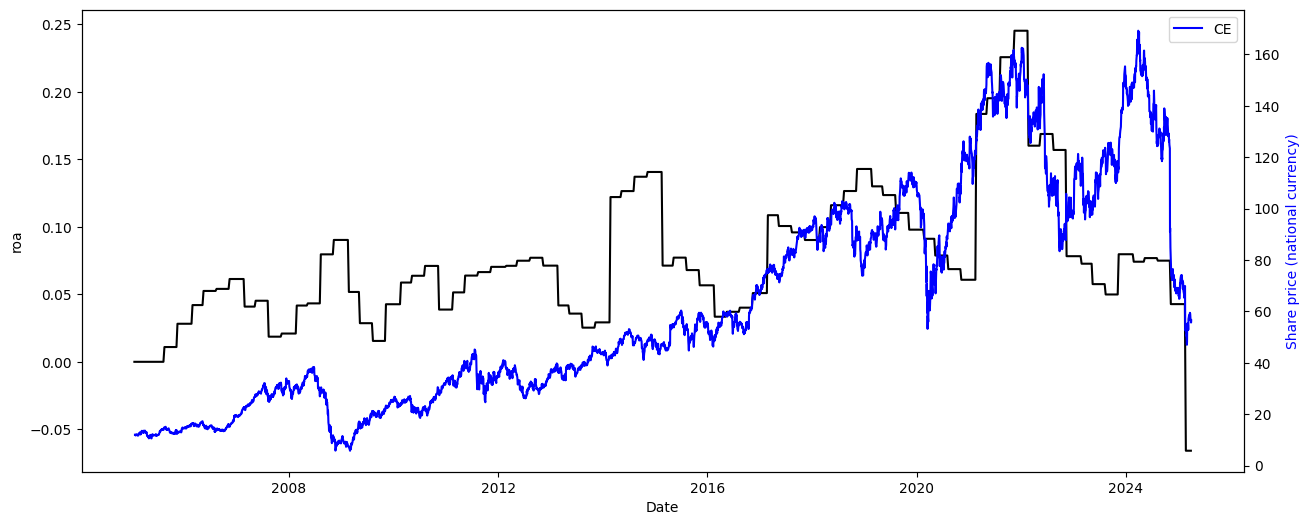

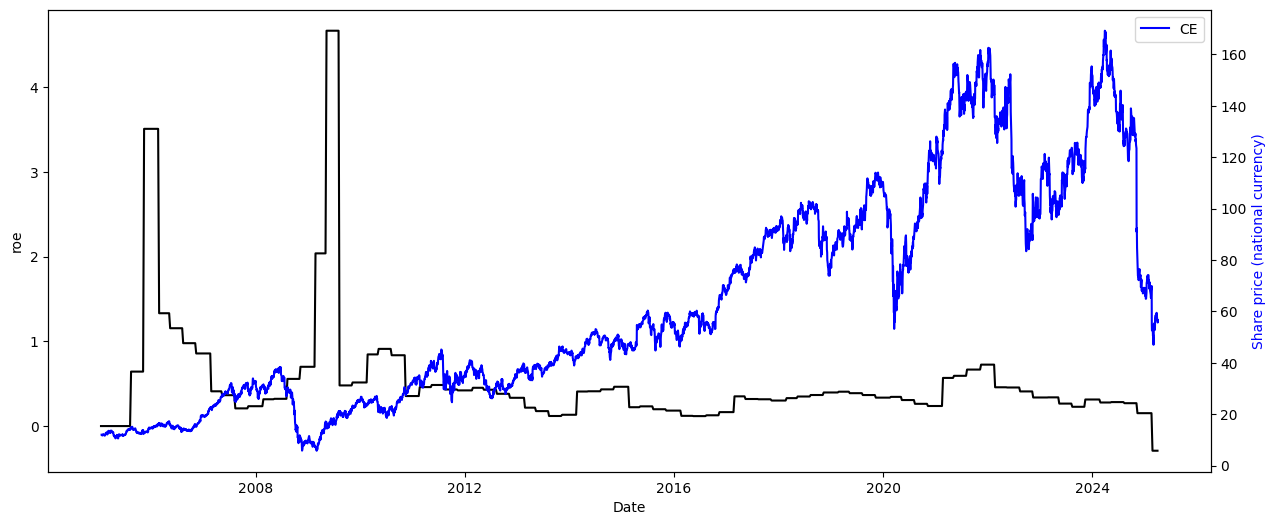

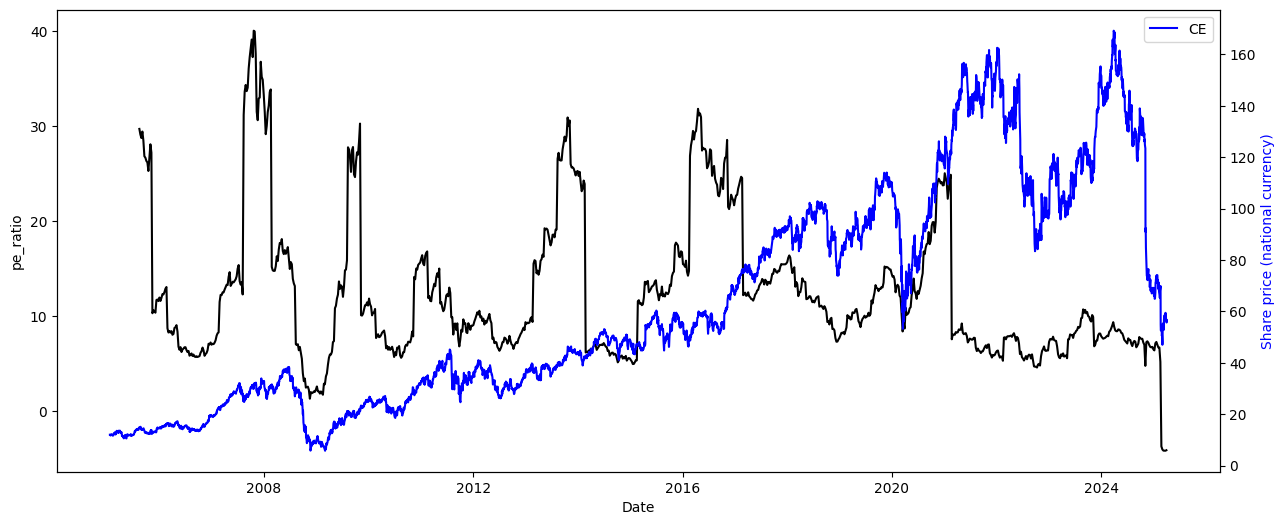

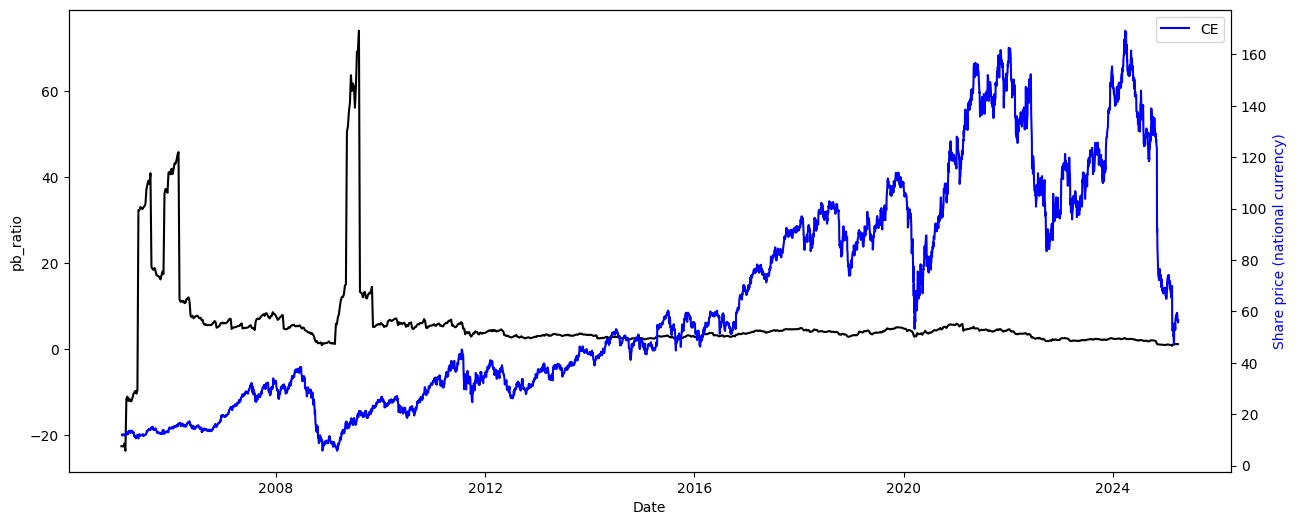

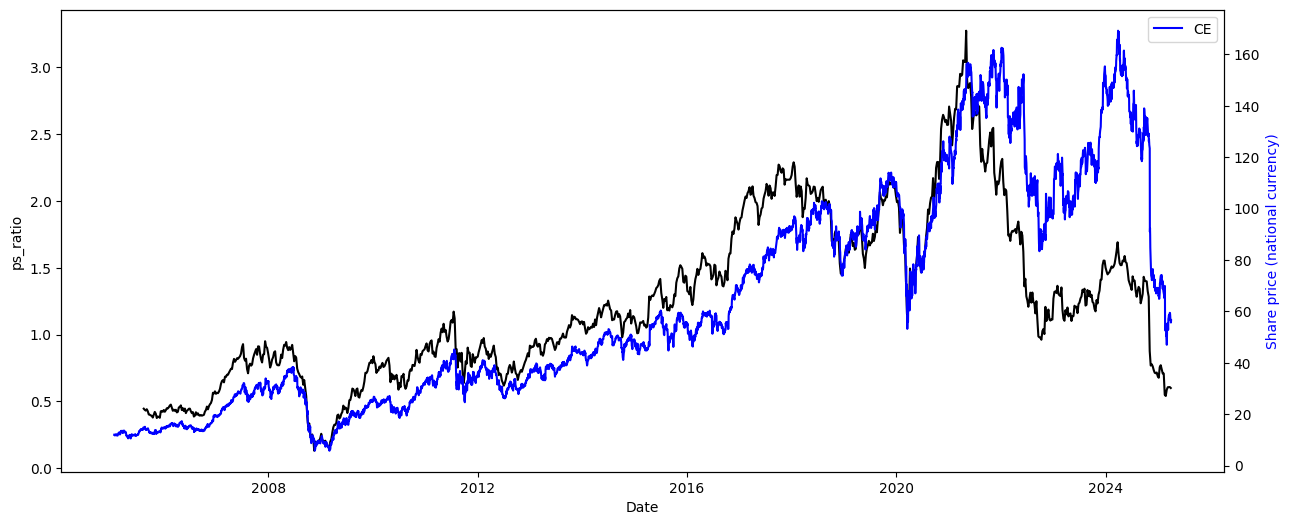

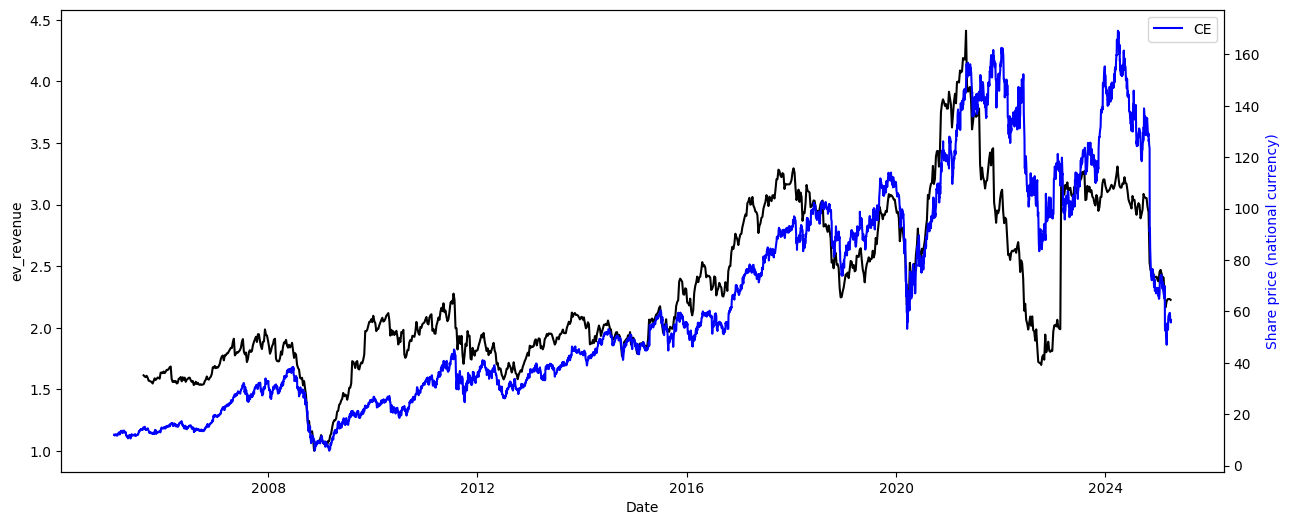

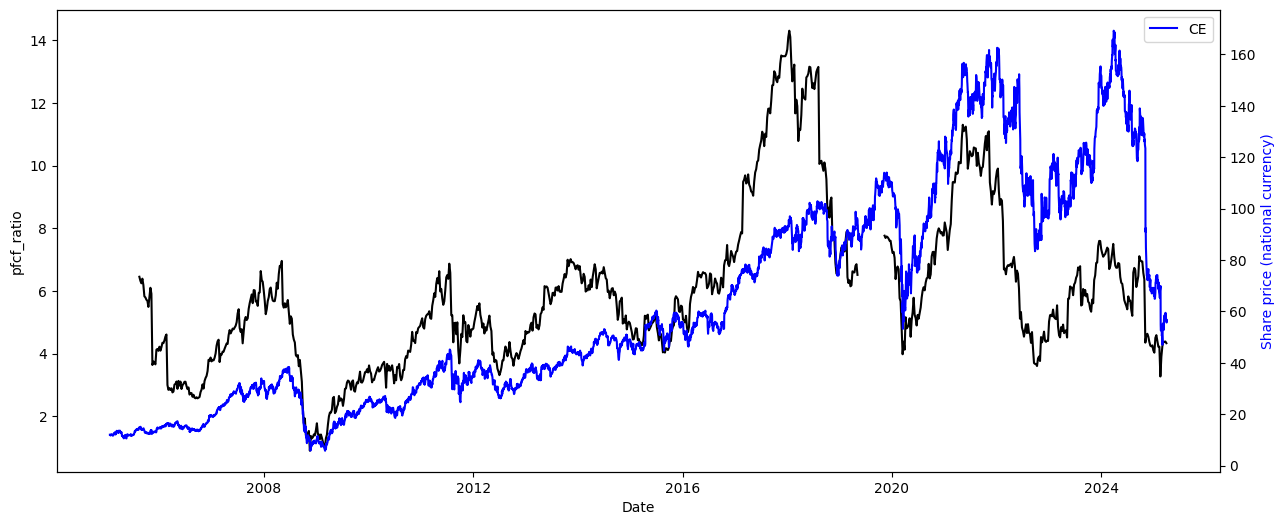

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

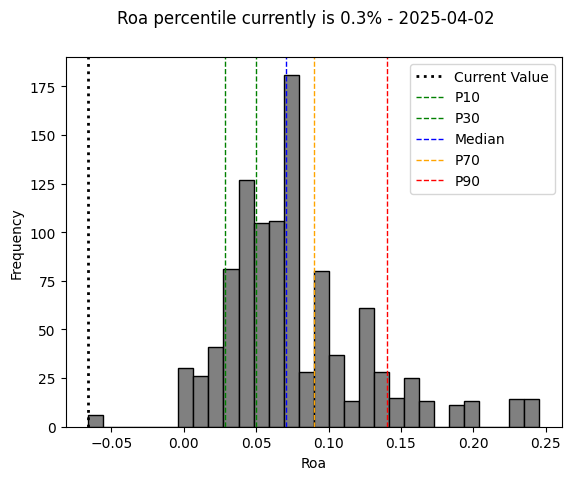

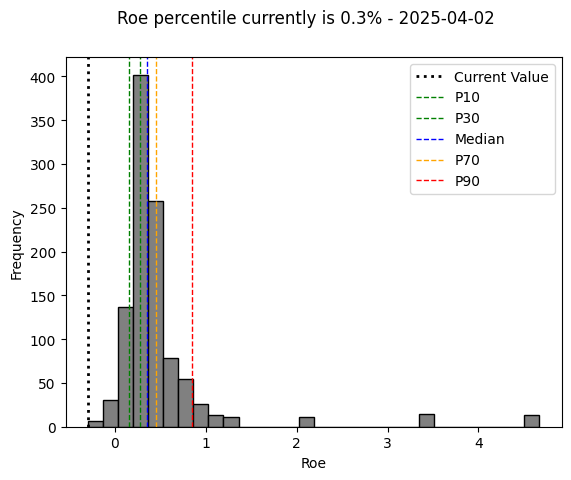

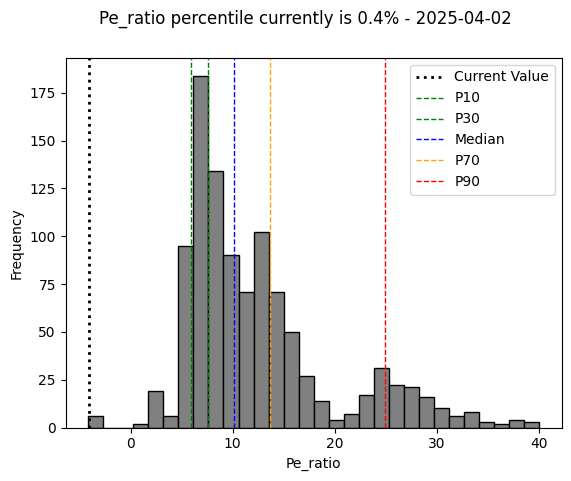

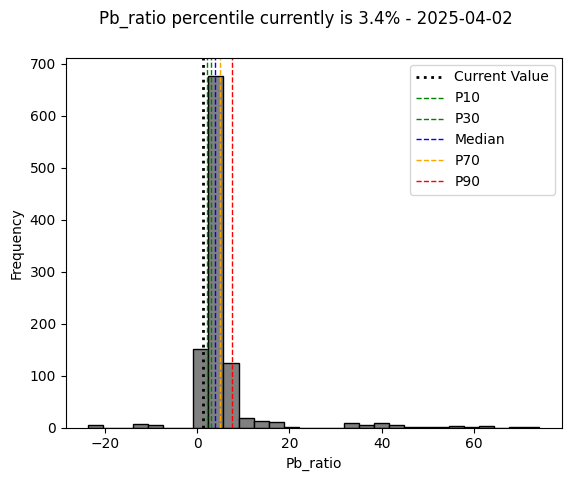

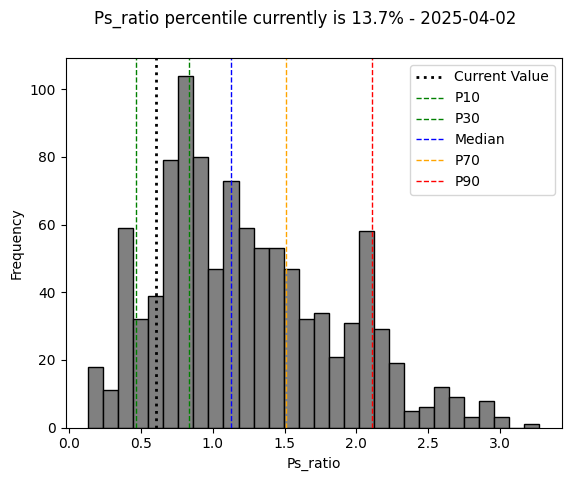

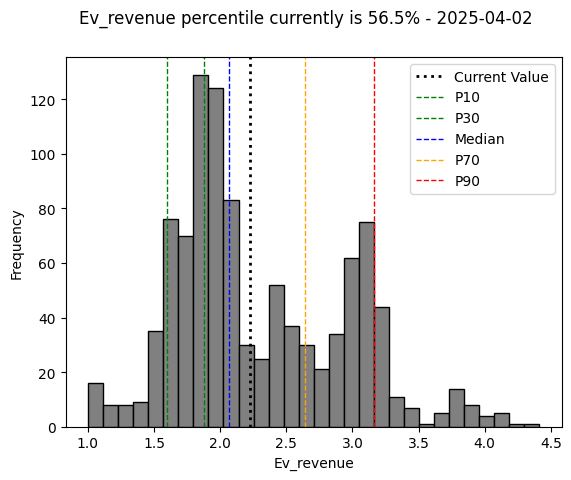

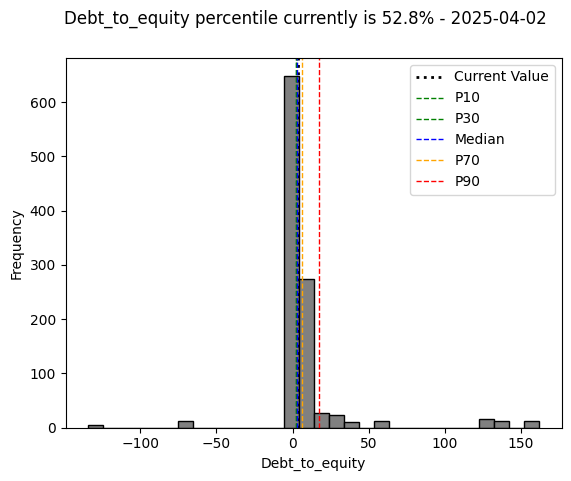

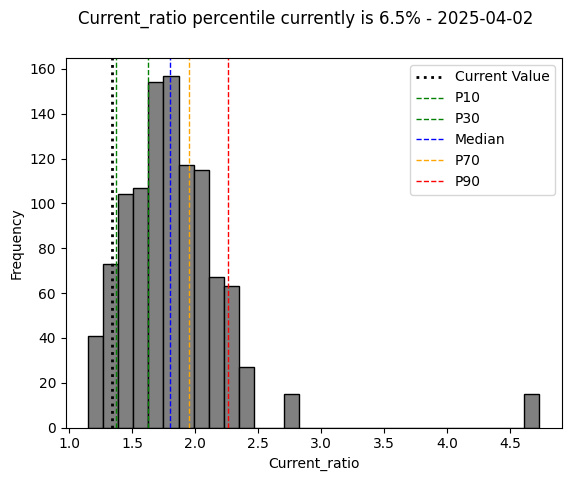

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,-0.044414,-0.468733,-0.216454,0.597288,0.426751,-0.222386,0.158832
roe,-0.044414,1.000000,-0.169960,0.800223,-0.329643,-0.316116,0.717253,-0.090672
pe_ratio,-0.468733,-0.169960,1.000000,0.128471,0.099134,0.044591,0.060923,0.023430
pb_ratio,-0.216454,0.800223,0.128471,1.000000,-0.267220,-0.250297,0.963045,-0.091905
ps_ratio,0.597288,-0.329643,0.099134,-0.267220,1.000000,0.906984,-0.383556,0.119556
ev_revenue,0.426751,-0.316116,0.044591,-0.250297,0.906984,1.000000,-0.340153,-0.071720
debt_to_equity,-0.222386,0.717253,0.060923,0.963045,-0.383556,-0.340153,1.000000,-0.094899
current_ratio,0.158832,-0.090672,0.023430,-0.091905,0.119556,-0.071720,-0.094899,1.000000


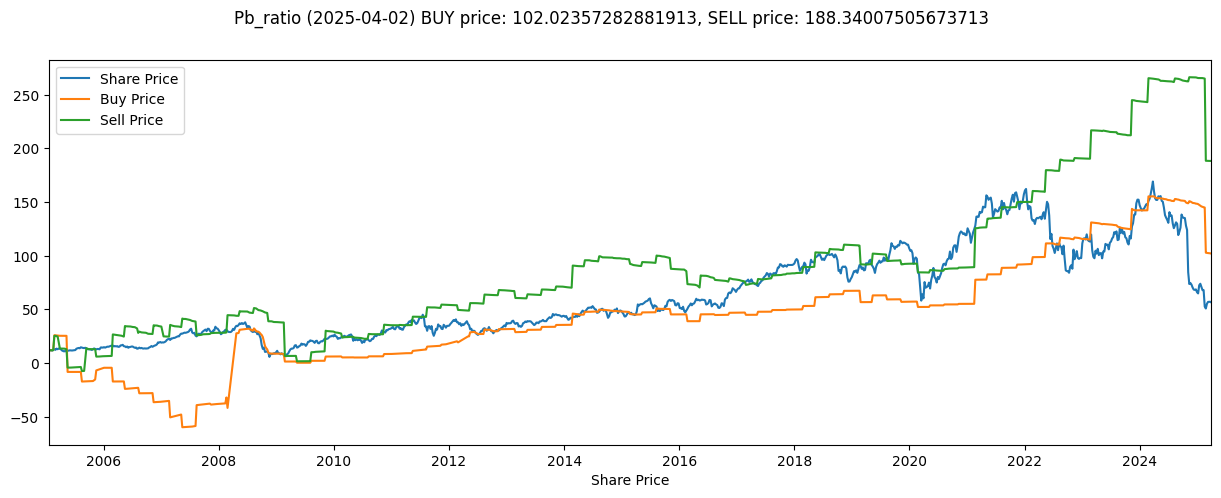

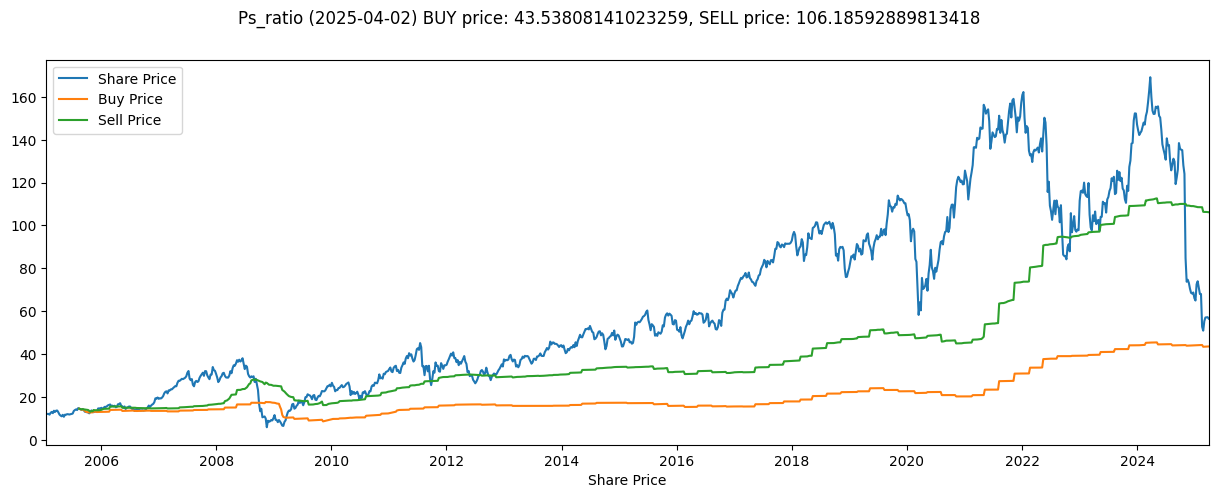

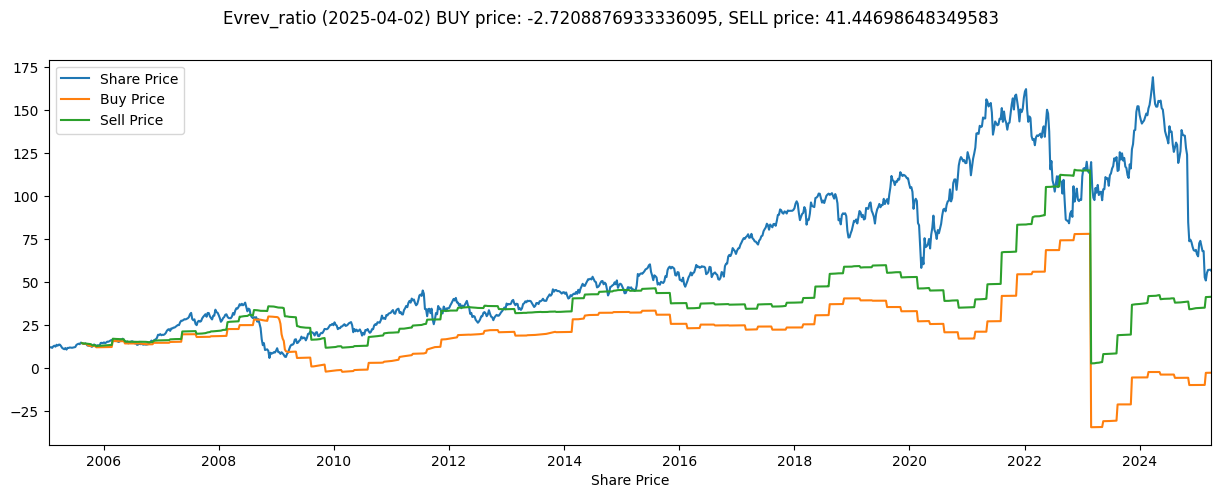

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.1,
    max_pct=0.5,
    owned_shares=owned_shares
)